
<style>
h1{
  font-size: 20px;
}
</style>

<center><h1>MOVIE BOX OFFICE GROSS PREDICTION USING IBM WATSON MACHINE LEARNING</h1></center>
<br>
<center><h2>PROJECT WORKFLOW</h2></center>

1. Importing Libraries.

2. Reading the dataset. 

3. Data preprocessing.


 3.1 - Exploratory Data Analysis.

 3.2 - Converting json objects to strings.

 3.3 - Checking for Null Values.

 3.4 - Data Visualization.

 3.5 - Dropping the columns.

 3.6 - Label Encoding.

 3.7 - Splitting the Dataset into Dependent and Independent variable.

 3.8 - Feature scaling.
 
 3.9 - Splitting Data into Train and Test.


4. Model Building.

 4.1 Training and testing the model.

 4.2 Evaluation of Model

 4.3 Save the model

 4.4 Predicting the output using the model

5. Application Building


<!DOCTYPE html>
<html>
<body>

<center><h2>Movie Box Office Gross</h2></center>
<img src="https://media.istockphoto.com/photos/new-york-city-box-office-picture-id185077766?b=1&k=20&m=185077766&s=612x612&w=0&h=__sCn4AEwfPMxLjE9B5TqqOd5han9BtyQeI5SIrBwCM=" alt="Trulli" width="700" height="388">

</body>
</html>

# 1.Importing Libraries 📚
**Importing libraries** that will be used in this notebook.

In [145]:
import pandas as pd                  #data analysis and manipulation
import numpy as np                   # a large collection of high-level mathematical functions
import seaborn as sns                #visualize random distributions.
import json                          #for reading json object
import matplotlib.pyplot as plt      #static, animated, and interactive visualizations 
import pickle                        # For saving the model file
from wordcloud import WordCloud      #to create word clouds
from ast import literal_eval         #to evaluate the string as python expression

# 2.Reading the dataset.
Reading datasets from google drive links


In [146]:
credits_url='https://drive.google.com/file/d/1YS_669Ge0XKkvmeaM6RAEhCsGnscA3eT/view?usp=sharing'
credits_url='https://drive.google.com/uc?id=' + credits_url.split('/')[-2]
df_credits = pd.read_csv(credits_url)

In [147]:
movies_url='https://drive.google.com/file/d/1LFnh-73WMsNpUYzIFROEjRc9guBT2z56/view?usp=sharing'
movies_url='https://drive.google.com/uc?id=' + movies_url.split('/')[-2]
df_movies = pd.read_csv(movies_url)

# 3.Data Pre-processing

# 3.1 - Exploratory Data Analysis


**pandas.head** 👉 Read the first 5 rows in the dataset.

In [148]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [149]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**pandas.tail** 👉 Read the last 5 rows in the dataset.

In [150]:
df_credits.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [151]:
df_movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [152]:
#print the columns
print("credits:",df_credits.columns)
print("movies:",df_movies.columns)

credits: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
movies: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [153]:
#shape of the dataset
print("df_credits:",df_credits.shape)
print("df_movies:",df_movies.shape)

df_credits: (4803, 4)
df_movies: (4803, 20)


# Merging the two datasets
id column in df_movies is similar to movie_id in df_credits dataset.Let us merge these two datasets, df_movies and df_credits using common key.Therefore rename the column movie_id in df_credits to id.


In [154]:
credits=df_credits.rename(index=str,columns={"movie_id":"id"})
movies=df_movies.merge(credits,on="id")

In [155]:
movies.shape

(4803, 23)

In [156]:
print("Movies:",movies.columns)

Movies: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')


In [157]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [158]:
movies.info()#Pandas.info() - Provides information regarding the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [159]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [160]:
movies['crew']

0       [{"credit_id": "52fe48009251416c750aca23", "de...
1       [{"credit_id": "52fe4232c3a36847f800b579", "de...
2       [{"credit_id": "54805967c3a36829b5002c41", "de...
3       [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4       [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
                              ...                        
4798    [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799    [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800    [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802    [{"credit_id": "58ce021b9251415a390165d9", "de...
Name: crew, Length: 4803, dtype: object

# 3.2 - Converting Json Objects To Strings

In [161]:
movies['crew']=movies['crew'].apply(json.loads)
def director(x):
  for i in x:
    if i['job']=='Director':
      return i['name']

movies['crew']=movies['crew'].apply(director)    
movies.rename(columns={'crew':'director'},inplace=True)  

In [162]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
  movies[feature]=movies[feature].apply(literal_eval)

In [163]:
def get_list(x):
  if isinstance(x,list):
    names=[i['name']for i in x]
    if len(names)>1:
      names=names[:1]
    return names

  return []    

In [164]:
features=['keywords','genres']
for feature in features:
  movies[feature]=movies[feature].apply(get_list)


In [165]:
movies['genres']

0            [Action]
1         [Adventure]
2            [Action]
3            [Action]
4            [Action]
            ...      
4798         [Action]
4799         [Comedy]
4800         [Comedy]
4801               []
4802    [Documentary]
Name: genres, Length: 4803, dtype: object

In [95]:
movies['genres'].explode().unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TV Movie', nan, 'Foreign'], dtype=object)

In [96]:
movies['director'].unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'Scott Smith', 'Daniel Hsia', 'Brian Herzlinger'], dtype=object)

In [97]:
movies['genres']=movies['genres'].str.join(', ')
movies['genres']

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801               
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [98]:
movies.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


# 3.3 -  Checking For Null Values

In [99]:
movies.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title_x                 False
vote_average            False
vote_count              False
title_y                 False
cast                    False
director                 True
dtype: bool

In [100]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                  30
dtype: int64

<AxesSubplot:>

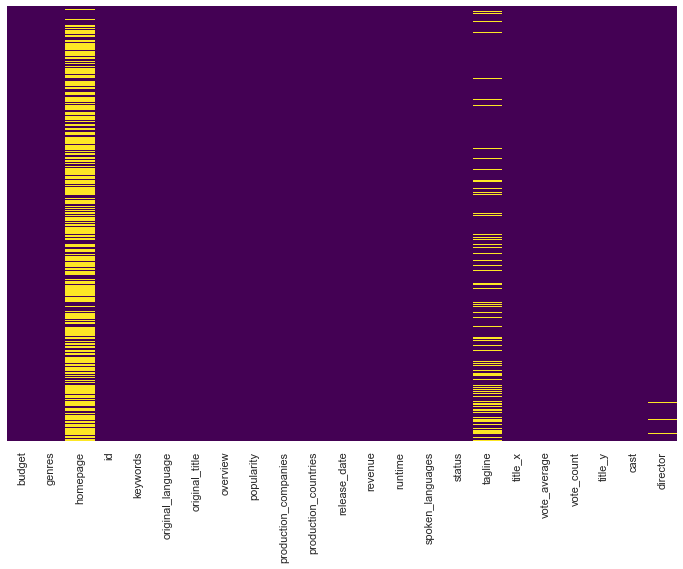

In [101]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [102]:
movies=movies.dropna(subset=['director','runtime'])

In [103]:
movies["revenue"]=movies["revenue"].floordiv(1000000)
movies["budget"]=movies["budget"].floordiv(1000000)

In [104]:
movies=movies[movies['budget']!=0]

In [105]:
movies['release_date']=pd.DataFrame(pd.to_datetime(movies['release_date'],dayfirst=True))
movies['release_month']=movies['release_date'].dt.month
movies['release_DOW']=movies['release_date'].dt.dayofweek

# 3.4 - Data Visualization

Text(0.5, 1.0, 'Boxplot of Runtime')

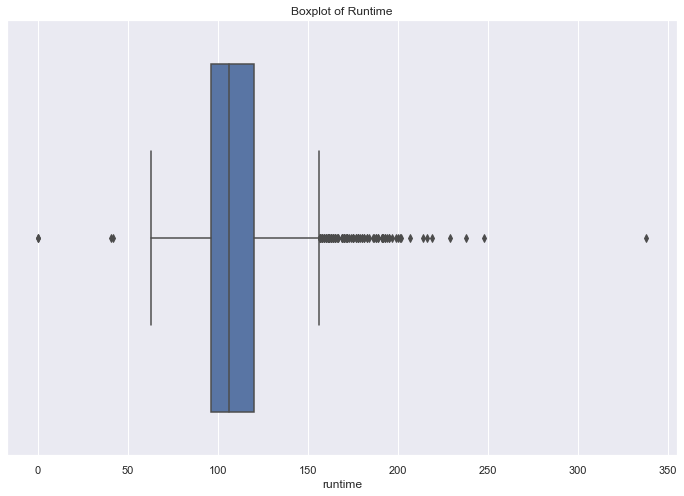

In [106]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

Text(0.5, 1.0, 'Boxplot of Revenue')

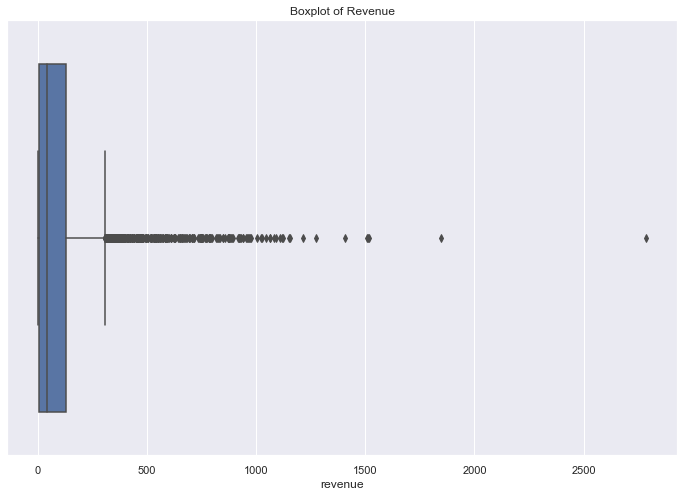

In [107]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

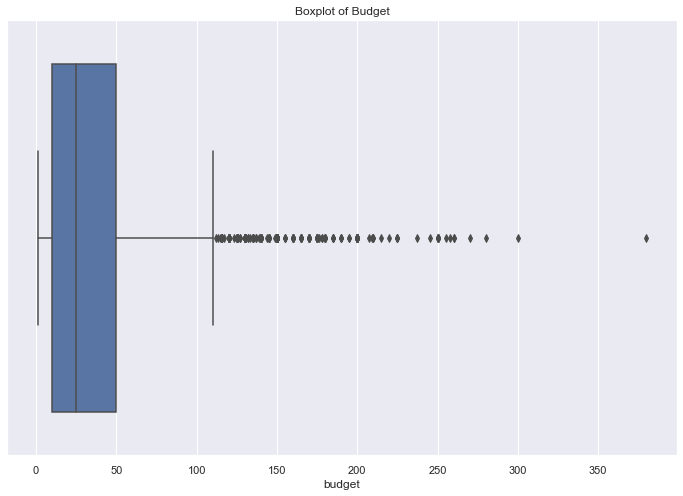

In [108]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

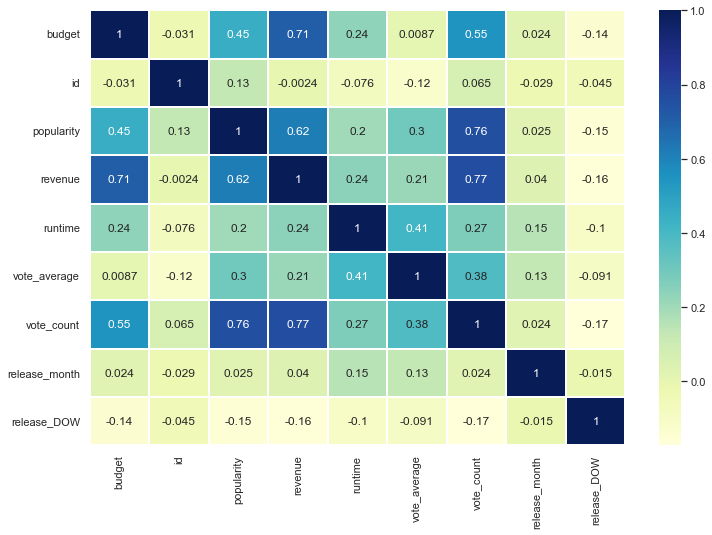

In [109]:
sns.heatmap(movies.corr(),cmap='YlGnBu',annot=True,linewidths=0.2);

we see that the output to be predicted "Revenue" depends more on budget,popularity and vote_count columns as they have correlation >=0.5
Well, this explains that revenue is strongly correlated with the budget of the movies, and runtime is least correlated with revenue.So we can say that Budget of movie is directly related for the revenue generated.


Let’s plot the distribution of revenue using seaborn distplot.

The data in revenue column is very skewed and therefore it is difficult to draw a conclusion from this graph. we need to normalize this data. Therefore we will be normalizing it using log transformation.

In [110]:
movies['log_revenue']=np.log1p(movies['revenue'])
movies['log_budget']=np.log1p(movies['budget'])

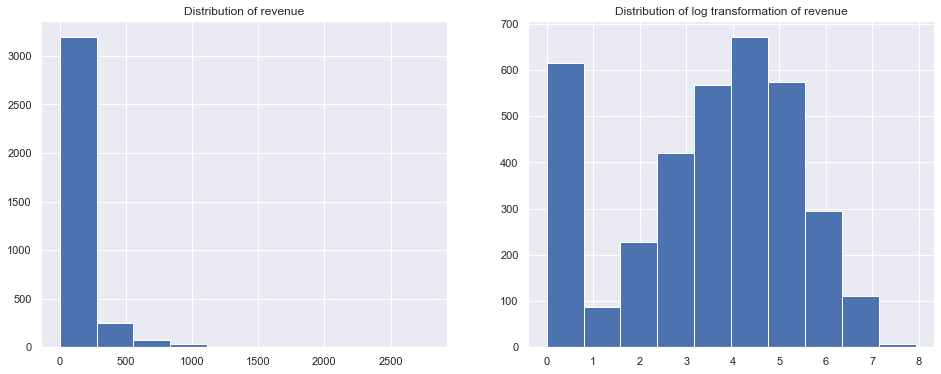

In [111]:
fig,ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist (movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist (movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

We can see that original distribution i.e (one without log) is extremely skewed. We used the log transformation method and made data normally distributed which has less skewness and kurtosis.

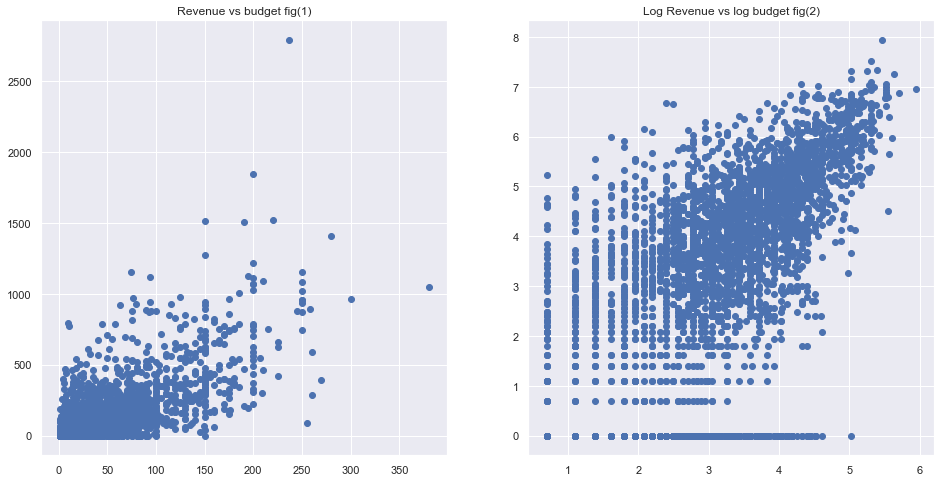

In [112]:
#Let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter (movies ['budget'], movies['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter (movies ['log_budget'], movies['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

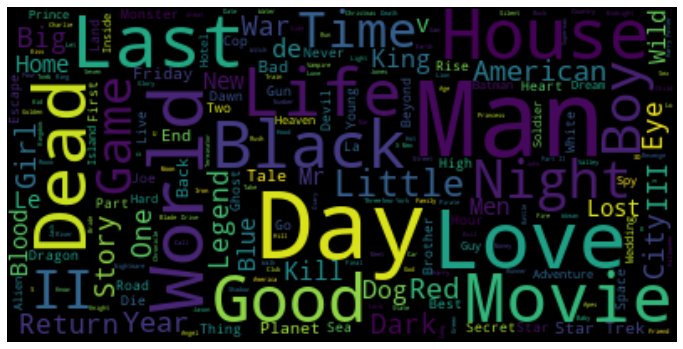

In [113]:
wordcloud = WordCloud ().generate (movies.original_title.to_string())
sns.set(rc={'figure.figsize': (12,8)})
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

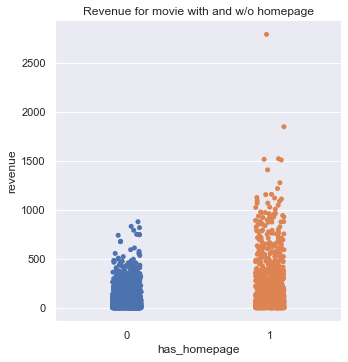

In [114]:
#Let's creat column called has homepage and pass two value 1,0 (1, indicates has home page, e indicates no
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1#1 here means it has home page
#since has homepage is categorical value we will be using seaborn catplot. 
sns.catplot(x='has_homepage', y='revenue', data=movies); 
plt.title('Revenue for movie with and w/o homepage');

C:\Users\RAHUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'revenue')

<Figure size 1080x576 with 0 Axes>

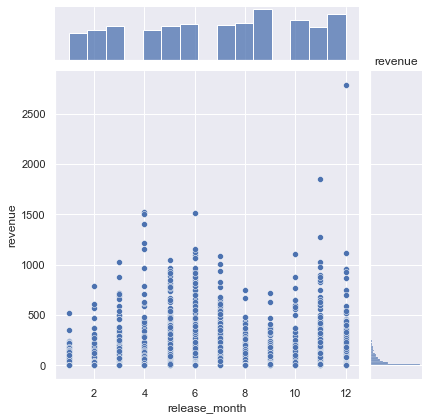

In [115]:
#Relationship between release_month and revenue
plt.figure(figsize=(15,8))
sns.jointplot (movies.release_month, movies.revenue);
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')

# 3.5 - Dropping the columns which are not required for analysis

In [116]:
#Dropping the columns which are not required for analysis
movies_box = movies.drop(['homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview','production_companies','production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title_x', 'title_y', 'cast', 'log_revenue', 'log_budget', 'has_homepage'], axis = 1)

In [117]:
print(movies_box['genres'].unique())


['Action' 'Adventure' 'Fantasy' 'Animation' 'Science Fiction' 'Drama'
 'Thriller' 'Family' 'Comedy' 'History' 'War' 'Western' 'Romance' 'Crime'
 'Mystery' 'Horror' 'Music' 'Documentary' 'TV Movie']


In [118]:
movies_box.isnull().sum()

budget           0
genres           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
director         0
release_month    0
release_DOW      0
dtype: int64

# 3.6 - Label Encoding

•	Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [119]:
# Label encoding features to change categorical variables into numerical one
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['director', 'genres']
for i in movies_box[cat]: #Looping through all the categorical columns 
   print("LABEL ENCODING OF:",i)
   LE = LabelEncoder()#creating an object of LabelEncoder
   print(c(movies_box[i])) #getting the classes values before transformation
   movies_box[i] = LE.fit_transform(movies_box[i]) # transforming our text 
   print(c(movies_box[i])) #getting the classes values after transformation

LABEL ENCODING OF: director
Counter({'Steven Spielberg': 27, 'Clint Eastwood': 19, 'Ridley Scott': 16, 'Martin Scorsese': 16, 'Woody Allen': 16, 'Steven Soderbergh': 15, 'Renny Harlin': 15, 'Robert Rodriguez': 15, 'Tim Burton': 14, 'Oliver Stone': 14, 'Robert Zemeckis': 13, 'Michael Bay': 12, 'Ron Howard': 12, 'Joel Schumacher': 12, 'Tony Scott': 12, 'Brian De Palma': 12, 'Francis Ford Coppola': 12, 'Barry Levinson': 11, 'Bobby Farrelly': 11, 'David Fincher': 10, 'Shawn Levy': 10, 'Richard Donner': 10, 'Chris Columbus': 10, 'Paul W.S. Anderson': 10, 'Rob Reiner': 10, 'Joel Coen': 10, 'Wes Craven': 10, 'Kevin Smith': 10, 'Richard Linklater': 10, 'Sam Raimi': 9, 'Peter Jackson': 9, 'Rob Cohen': 9, 'M. Night Shyamalan': 9, 'John McTiernan': 9, 'Spike Lee': 9, 'John Carpenter': 9, 'Christopher Nolan': 8, 'Bryan Singer': 8, 'Brett Ratner': 8, 'Martin Campbell': 8, 'Roland Emmerich': 8, 'Quentin Tarantino': 8, 'Simon West': 8, 'Dennis Dugan': 8, 'Adam Shankman': 8, 'F. Gary Gray': 8, 'Antoin

In [120]:
mapping_dict ={}
category_col=["director","genres"]
for col in category_col:
  LE_name_mapping=dict(zip(LE.classes_,
                           LE.transform(LE.classes_)))
  mapping_dict[col]= LE_name_mapping 
  print(mapping_dict)

{'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}
{'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}, 'genres': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}


# 3.7 - Splitting The Dataset Into Dependent And Independent Variable.

•	In machine learning, the concept of dependent variable (y) and independent variables(x) is important to understand. Here, Dependent variable is nothing but output in dataset and independent variable is all inputs in the dataset. 

•	With this in mind, we need to split our dataset into the matrix of independent variables and the vector or dependent variable. Mathematically, Vector is defined as a matrix that has just one column.

In [121]:
x=movies_box.iloc[:,[0,1,2,4,5,6,7,8,9]]
x=pd.DataFrame(x, columns=['budget', 'genres', 'popularity', 'runtime', 'vote_average', 'vote_count', 'director', 'release_month', 'release_DOW'])
x

,budget,genres,popularity,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,0,150.437577,162.0,7.2,11800,616,12,3
1,300,1,139.082615,169.0,6.9,4500,536,5,5
2,245,0,107.376788,148.0,6.3,4466,1345,10,0
3,250,0,112.312950,165.0,7.6,9106,245,7,0
4,260,0,43.926995,132.0,6.1,2124,65,3,2
...,...,...,...,...,...,...,...,...,...
4586,35,3,38.100488,99.0,5.8,923,1534,5,2
4596,6,10,19.331884,89.0,6.0,316,468,12,2
4682,13,10,4.009379,95.0,4.6,24,446,1,4
4720,8,6,9.452808,120.0,6.5,178,1085,9,4


In [122]:
y=movies_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


#3.8 -  Feature Scaling

In [123]:
!pip install sklearn

In [124]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 4.6119201 , -1.10962   ,  3.53184628, ..., -0.46236379,
         1.48974933, -0.11265796],
       [ 6.07901328, -0.88369987,  3.20720932, ..., -0.63226827,
        -0.57429457,  1.39493336],
       [ 4.79821765, -1.10962   ,  2.30074366, ...,  1.08589076,
         0.9000225 , -2.37404493],
       ...,
       [-0.60441118,  1.14958124, -0.65451776, ..., -0.82341081,
        -1.75374823,  0.6411377 ],
       [-0.72084715,  0.24590074, -0.4988908 , ...,  0.53370121,
         0.60515909,  0.6411377 ],
       [-0.81399592,  2.50510198,  0.02172764, ...,  1.62746128,
        -1.1640214 ,  1.39493336]])

In [125]:
pickle.dump(sc,open("scalar_movies.pkl","wb"))

#3.9 - Split The Dataset Into Train Set And Test Set

Let us allocate allocate 80% of the dataset to training set and the remaining 20% to test set.

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

# 4. Model Building

# 4.1 - Train And Test The Model Using Linear Regression.

In [127]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [128]:
x_test

array([[ 0.02434304, -0.43185963,  0.08863398, ..., -0.72783954,
         0.31029567,  0.6411377 ],
       [ 0.02434304,  0.24590074, -0.46284717, ..., -0.43687812,
         1.48974933, -1.62024927],
       [-0.62769838,  0.24590074,  0.01199324, ...,  0.64201531,
        -1.45888481, -0.11265796],
       ...,
       [ 0.39693813, -1.10962   ,  0.24511761, ..., -1.75576163,
        -1.1640214 ,  0.6411377 ],
       [-0.69755995,  2.50510198, -0.57822433, ..., -0.86163932,
         1.19488592,  0.6411377 ],
       [ 1.14212831, -0.88369987,  0.37839529, ...,  1.38959501,
         0.31029567,  0.6411377 ]])

In [129]:
y_test[0:5]

,revenue
1045,95
1974,0
2883,12
117,474
3074,3


In [130]:
y_pred_mr=mr.predict(x_test)
y_pred_mr[0:5]

array([[9.84737546e+01],
       [1.02323905e+02],
       [5.61664235e+01],
       [4.87424644e+02],
       [3.41534770e-01]])

In [131]:
y_test

,revenue
1045,95
1974,0
2883,12
117,474
3074,3
...,...
3949,11
252,227
807,113
3209,0


# 4.2 -  Model Evaluation


In [132]:
print(mr.predict([[237,0,150.437577,162,7,.2,11800,12,3]]))

[[21874.81305137]]


In [133]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mr)))

MAE: 56.52764663167956
RMSE: 7.518486990856575


In [134]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.7174505906933415

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs = -1,random_state=42)
rf.fit(x_train,y_train)
y_pred_mr=mr.predict(x_test)
r2_score(y_test,y_pred_mr)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_13148\2403418935.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.7174505906933415

# 4.3 - Saving the model

In [136]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

# 4.4 - Predicting The Output Using The Model

In [137]:
model=pickle.load(open("model_movies.pkl","rb"))
scalar=pickle.load(open("scalar_movies.pkl","rb"))

In [138]:
input=[[50,8,20.239061,88,5,366,719,7,3]]
input=scalar.transform(input)
prediction=model.predict(input)

C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
prediction

array([[88.42348926]])

In [140]:
print(int(prediction))

88


In [141]:
mr.score(x_test,y_test)

0.7174505906933415

We have got 71% accuracy by using linear regression algorithm.

# 5. Application Building

Application Building can be done by using Spyder/Pycharm from Anaconda Navigator where we create the flask application with html pages as frontend and execution will be performed from these created models, html pages and flask code